# HP Tuning (static + dynamic - categorical)

In [32]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.grid_search import ParameterGrid

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn import tree
import graphviz

%matplotlib inline

In [33]:
df_results = pd.DataFrame()

In [34]:
# metrics for each class + weighted average (- bad impact)
# micro f1 = accuracy
def print_metrics(cls, X_test, y_test):
    global df_results
    
    predicted = cls.predict(X_test)
    sns.heatmap(metrics.confusion_matrix(y_test, predicted), annot=True, fmt='g', annot_kws={"size": 16})
    print('accuracy: ',metrics.accuracy_score(y_test, predicted))
    print()
    print(metrics.classification_report(y_test, predicted))
    print('macro precision: ',metrics.precision_score(y_test, predicted, average='macro'))
    print('micro precision: ',metrics.precision_score(y_test, predicted, average='micro'))
    print()
    print('micro recall: ',metrics.recall_score(y_test, predicted, average='micro'))
    print('macro recall: ',metrics.recall_score(y_test, predicted, average='macro'))
    print()
    print('micro f1: ',metrics.f1_score(y_test, predicted, average='micro'))
    print('macro f1: ',metrics.f1_score(y_test, predicted, average='macro'))
    
    df_result = pd.DataFrame({
        'Algoritmus': [str(cls).split('(')[0]],
        
        'Transformácia': ['áno' if transformed else 'nie'],
        
        'S': [round(metrics.accuracy_score(y_test, predicted), 2)],
        
        'P_0': [round(precision_score(y_test, cls.predict(X_test), average=None)[0], 2)],
        'P_1': [round(precision_score(y_test, cls.predict(X_test), average=None)[1], 2)],
        'P_2': [round(precision_score(y_test, cls.predict(X_test), average=None)[2], 2)],
        'P_3': [round(precision_score(y_test, cls.predict(X_test), average=None)[3], 2)],
        
        'Ú_0': [round(recall_score(y_test, cls.predict(X_test), average=None)[0], 2)],
        'Ú_1': [round(recall_score(y_test, cls.predict(X_test), average=None)[1], 2)],
        'Ú_2': [round(recall_score(y_test, cls.predict(X_test), average=None)[2], 2)],
        'Ú_3': [round(recall_score(y_test, cls.predict(X_test), average=None)[3], 2)],
        
        'F1_makro': [round(metrics.f1_score(y_test, predicted, average='macro'), 2)],
    })
        
    df_results = df_results.append(df_result, ignore_index=True)
    
    plt.show()

# Original data

In [35]:
transformed = False

In [36]:
features = pd.read_csv('data/split/transformed/train_original.csv', index_col=0)
df = pd.read_csv('data/split/transformed/test_original.csv', index_col=0)
features = features.append(df, ignore_index=True)

features = features[features['ratio_running_duration'] < 25]

labels = features['class']
features = features.drop('class', axis=1)

features.shape

(6284, 41)

In [37]:
featuresCV = pd.read_csv('data/split/transformed/cv_original.csv', index_col=0)

featuresCV = featuresCV[featuresCV['ratio_running_duration'] < 25]

labelsCV = featuresCV['class']
featuresCV = featuresCV.drop('class', axis=1)

featuresCV.shape

(1572, 41)

## Decision Tree

In [38]:
cls = DecisionTreeClassifier

In [39]:
params = {
    'criterion': ['gini', 'entropy'],
    # 'splitter': ['best', 'random'],
    'max_depth': range(1, 20),
    'min_samples_split': range(1, 60, 10),
    'min_samples_leaf': range(1, 20, 5),
    #'min_weight_fraction_leaf': ,
    #'max_features': [5, 10, 20, 30, 40],
    'random_state': [64],
    #'max_leaf_nodes': ,
    #'min_impurity_decrease': [0.0],
    'class_weight': [None, 'balanced']
}

In [40]:
len(list(ParameterGrid(params)))

1824

In [41]:
gs = GridSearchCV(cls(), params, scoring='accuracy', cv=5, n_jobs=-1, error_score=0)

In [42]:
%%time
gs.fit(features, labels)

Wall time: 4min 21s


GridSearchCV(cv=5, error_score=0,
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(1, 20), 'min_samples_split': range(1, 60, 10), 'min_samples_leaf': range(1, 20, 5), 'random_state': [64], 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [43]:
sorted(gs.grid_scores_, key=lambda x: x.mean_validation_score, reverse=True)[:5]

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.71579, std: 0.00574, params: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 11, 'random_state': 64},
 mean: 0.71579, std: 0.00574, params: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 21, 'random_state': 64},
 mean: 0.71579, std: 0.00574, params: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 31, 'random_state': 64},
 mean: 0.71579, std: 0.00574, params: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 41, 'random_state': 64},
 mean: 0.71579, std: 0.00574, params: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 51, 'random_state': 64}]

In [44]:
gs.best_params_

{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 6,
 'min_samples_split': 11,
 'random_state': 64}

In [45]:
gs.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=11,
            min_weight_fraction_leaf=0.0, presort=False, random_state=64,
            splitter='best')

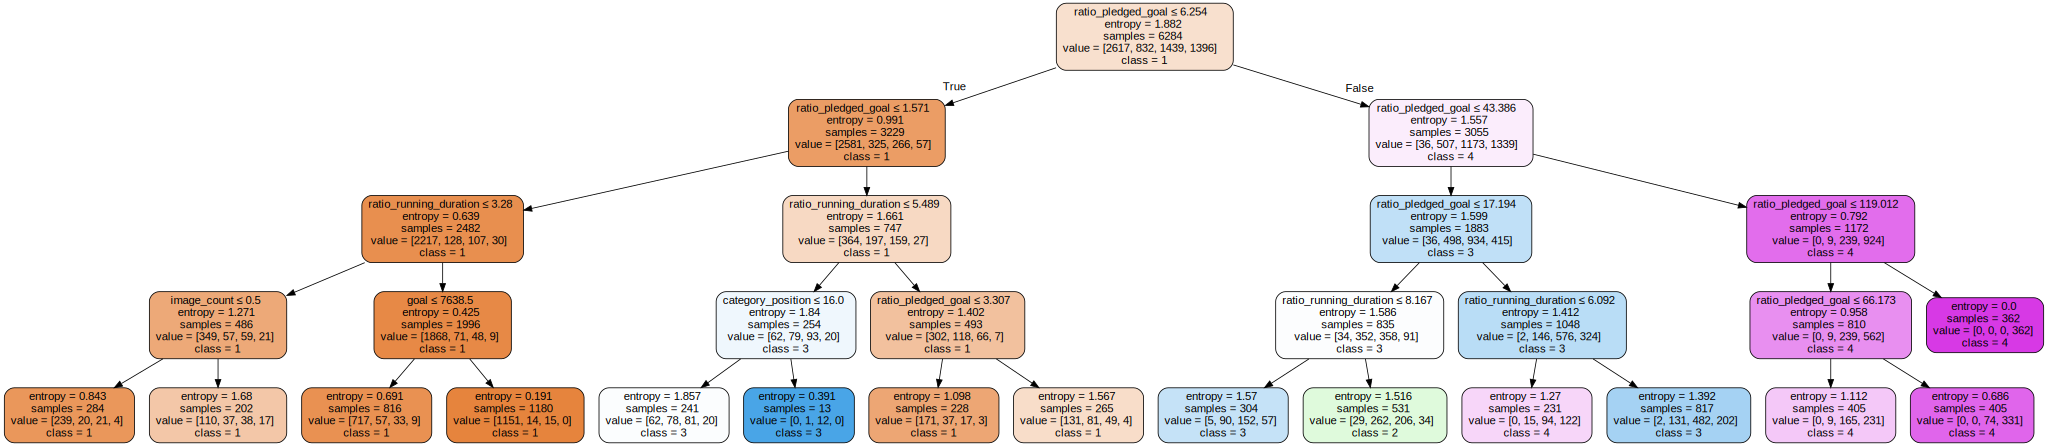

In [46]:
dot_data = tree.export_graphviz(gs.best_estimator_, out_file=None, feature_names=features.columns, class_names=['1','2','3','4'],filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data)
graph.render("tree", view=True)
graph

accuracy:  0.716921119593

             precision    recall  f1-score   support

          1       0.84      0.96      0.90       659
          2       0.49      0.28      0.36       209
          3       0.49      0.48      0.48       336
          4       0.75      0.74      0.75       368

avg / total       0.70      0.72      0.70      1572

macro precision:  0.641137514005
micro precision:  0.716921119593

micro recall:  0.716921119593
macro recall:  0.616643704255

micro f1:  0.716921119593
macro f1:  0.620764179785


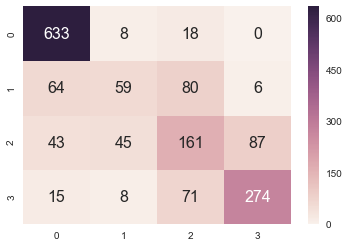

In [47]:
print_metrics(gs.best_estimator_, featuresCV, labelsCV)

## Gradient Boosting

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

In [49]:
cls = GradientBoostingClassifier

In [50]:
params = {
    'learning_rate': [0.12, 0.1, 0.08, 0.01, 0.2],
    'n_estimators': [150, 100, 50],
    'max_depth': [1, 2, 3, 4, 5],
    'random_state': [64],
    #'criterion': ['friedman_mse', 'mse'],
    #'min_samples_split': [2, 5, 10, 1.0, 3.0, 5.0, 10.0] # 2
    #'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10] # 1
}

In [51]:
gs = GridSearchCV(cls(), params, scoring='accuracy', cv=5, n_jobs=-1, error_score=0)

In [52]:
len(list(ParameterGrid(params)))

75

In [53]:
%%time
gs.fit(features, labels)

Wall time: 14min 33s


GridSearchCV(cv=5, error_score=0,
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.12, 0.1, 0.08, 0.01, 0.2], 'n_estimators': [150, 100, 50], 'max_depth': [1, 2, 3, 4, 5], 'random_state': [64]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [54]:
sorted(gs.grid_scores_, key=lambda x: x.mean_validation_score, reverse=True)[:50]

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.73409, std: 0.00815, params: {'learning_rate': 0.12, 'max_depth': 3, 'n_estimators': 50, 'random_state': 64},
 mean: 0.73377, std: 0.00958, params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'random_state': 64},
 mean: 0.73361, std: 0.00970, params: {'learning_rate': 0.08, 'max_depth': 3, 'n_estimators': 50, 'random_state': 64},
 mean: 0.73313, std: 0.00677, params: {'learning_rate': 0.2, 'max_depth': 1, 'n_estimators': 150, 'random_state': 64},
 mean: 0.73297, std: 0.01038, params: {'learning_rate': 0.08, 'max_depth': 4, 'n_estimators': 50, 'random_state': 64},
 mean: 0.73234, std: 0.01070, params: {'learning_rate': 0.08, 'max_depth': 3, 'n_estimators': 100, 'random_state': 64},
 mean: 0.73154, std: 0.00898, params: {'learning_rate': 0.08, 'max_depth': 2, 'n_estimators': 150, 'random_state': 64},
 mean: 0.73138, std: 0.00998, params: {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 50, 'random_state': 64},
 mean: 0.73106, std: 0.00884, params: {'learning

accuracy:  0.736005089059

             precision    recall  f1-score   support

          1       0.85      0.97      0.90       659
          2       0.46      0.28      0.35       209
          3       0.55      0.59      0.57       336
          4       0.80      0.72      0.76       368

avg / total       0.72      0.74      0.72      1572

macro precision:  0.662566762243
micro precision:  0.736005089059

micro recall:  0.736005089059
macro recall:  0.638065951282

micro f1:  0.736005089059
macro f1:  0.643096043697


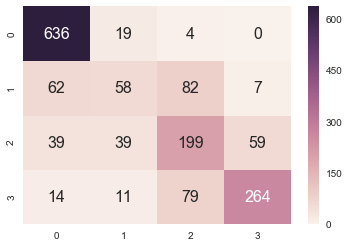

In [55]:
print_metrics(gs.best_estimator_, featuresCV, labelsCV)

### Try balanced class

In [ ]:
from sklearn.utils import class_weight
labels_weights = class_weight.compute_sample_weight('balanced', labels)

In [ ]:
%%time
gs.fit(features, labels, sample_weight=labels_weights)

In [ ]:
sorted(gs.grid_scores_, key=lambda x: x.mean_validation_score, reverse=True)

In [ ]:
print_metrics(gs.best_estimator_, featuresCV, labelsCV)

## KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
cls = KNeighborsClassifier

In [58]:
params = {
    'n_neighbors': [5, 10, 20, 50, 100, 200, 500, 1000],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

In [59]:
gs = GridSearchCV(cls(), params, scoring='accuracy', cv=5, n_jobs=-1, error_score=0)

In [60]:
len(list(ParameterGrid(params)))

64

In [61]:
%%time
gs.fit(features, labels)

Wall time: 3min 12s


GridSearchCV(cv=5, error_score=0,
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [5, 10, 20, 50, 100, 200, 500, 1000], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [62]:
sorted(gs.grid_scores_, key=lambda x: x.mean_validation_score, reverse=True)[:50]

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.69096, std: 0.00989, params: {'algorithm': 'auto', 'n_neighbors': 20, 'weights': 'distance'},
 mean: 0.69096, std: 0.00989, params: {'algorithm': 'ball_tree', 'n_neighbors': 20, 'weights': 'distance'},
 mean: 0.69096, std: 0.00989, params: {'algorithm': 'kd_tree', 'n_neighbors': 20, 'weights': 'distance'},
 mean: 0.69096, std: 0.00989, params: {'algorithm': 'brute', 'n_neighbors': 20, 'weights': 'distance'},
 mean: 0.68619, std: 0.00543, params: {'algorithm': 'auto', 'n_neighbors': 50, 'weights': 'distance'},
 mean: 0.68619, std: 0.00543, params: {'algorithm': 'ball_tree', 'n_neighbors': 50, 'weights': 'distance'},
 mean: 0.68619, std: 0.00543, params: {'algorithm': 'kd_tree', 'n_neighbors': 50, 'weights': 'distance'},
 mean: 0.68619, std: 0.00543, params: {'algorithm': 'brute', 'n_neighbors': 50, 'weights': 'distance'},
 mean: 0.68316, std: 0.00687, params: {'algorithm': 'auto', 'n_neighbors': 20, 'weights': 'uniform'},
 mean: 0.68316, std: 0.00687, params: {'algorithm': 'bal

accuracy:  0.69465648855

             precision    recall  f1-score   support

          1       0.78      0.98      0.87       659
          2       0.38      0.15      0.21       209
          3       0.49      0.52      0.51       336
          4       0.78      0.66      0.71       368

avg / total       0.67      0.69      0.67      1572

macro precision:  0.608994993525
micro precision:  0.69465648855

micro recall:  0.69465648855
macro recall:  0.576001406899

micro f1:  0.69465648855
macro f1:  0.575377444647


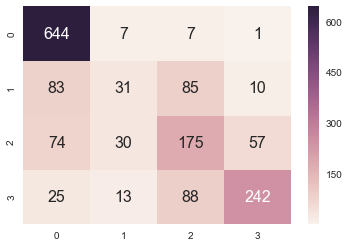

In [63]:
print_metrics(gs.best_estimator_, featuresCV, labelsCV)

## LogisticRegression

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
cls = LogisticRegression

In [66]:
params = {
    'C': [0.1, 1.0, 10.0],
    'class_weight': ['balanced', None],
    'random_state': [64],
    'solver': ['newton-cg', 'sag', 'saga', 'lbfgs'],
    'multi_class': ['ovr', 'multinomial'],
    'max_iter': [10, 50, 100, 200, 500]
}

In [67]:
gs = GridSearchCV(cls(), params, scoring='accuracy', cv=5, n_jobs=-1, error_score=0)

In [68]:
len(list(ParameterGrid(params)))

240

In [69]:
%%time
gs.fit(features, labels)

Wall time: 47min 40s


C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


GridSearchCV(cv=5, error_score=0,
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.1, 1.0, 10.0], 'class_weight': ['balanced', None], 'random_state': [64], 'solver': ['newton-cg', 'sag', 'saga', 'lbfgs'], 'multi_class': ['ovr', 'multinomial'], 'max_iter': [10, 50, 100, 200, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [71]:
sorted(gs.grid_scores_, key=lambda x: x.mean_validation_score, reverse=True)[:50]

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.73074, std: 0.01069, params: {'C': 0.1, 'class_weight': None, 'max_iter': 200, 'multi_class': 'multinomial', 'random_state': 64, 'solver': 'newton-cg'},
 mean: 0.73027, std: 0.01071, params: {'C': 10.0, 'class_weight': None, 'max_iter': 100, 'multi_class': 'multinomial', 'random_state': 64, 'solver': 'newton-cg'},
 mean: 0.72979, std: 0.01088, params: {'C': 0.1, 'class_weight': None, 'max_iter': 500, 'multi_class': 'multinomial', 'random_state': 64, 'solver': 'newton-cg'},
 mean: 0.72979, std: 0.01042, params: {'C': 1.0, 'class_weight': None, 'max_iter': 100, 'multi_class': 'multinomial', 'random_state': 64, 'solver': 'newton-cg'},
 mean: 0.72963, std: 0.01029, params: {'C': 0.1, 'class_weight': None, 'max_iter': 100, 'multi_class': 'multinomial', 'random_state': 64, 'solver': 'newton-cg'},
 mean: 0.72963, std: 0.01207, params: {'C': 1.0, 'class_weight': None, 'max_iter': 200, 'multi_class': 'multinomial', 'random_state': 64, 'solver': 'newton-cg'},
 mean: 0.72915, std: 0.0114

accuracy:  0.732824427481

             precision    recall  f1-score   support

          1       0.84      0.97      0.90       659
          2       0.48      0.30      0.37       209
          3       0.53      0.59      0.56       336
          4       0.81      0.68      0.74       368

avg / total       0.72      0.73      0.72      1572

macro precision:  0.667084742825
micro precision:  0.732824427481

micro recall:  0.732824427481
macro recall:  0.635836554376

micro f1:  0.732824427481
macro f1:  0.642975240587


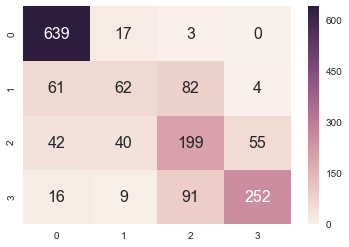

In [72]:
print_metrics(gs.best_estimator_, featuresCV, labelsCV)

In [73]:
df_results

,Algoritmus,F1_makro,P_0,P_1,P_2,P_3,S,Transformácia,Ú_0,Ú_1,Ú_2,Ú_3
0,DecisionTreeClassifier,0.62,0.84,0.49,0.49,0.75,0.72,nie,0.96,0.28,0.48,0.74
1,GradientBoostingClassifier,0.64,0.85,0.46,0.55,0.80,0.74,nie,0.97,0.28,0.59,0.72
2,KNeighborsClassifier,0.58,0.78,0.38,0.49,0.78,0.69,nie,0.98,0.15,0.52,0.66
3,LogisticRegression,0.64,0.84,0.48,0.53,0.81,0.73,nie,0.97,0.30,0.59,0.68


# Transformed features (Robust Scaler + Box-Cox)

In [74]:
transformed = True

In [75]:
features = pd.read_csv('data/split/transformed/train.csv', index_col=0)
df = pd.read_csv('data/split/transformed/test.csv', index_col=0)
features = features.append(df, ignore_index=True)

features = features[features['ratio_running_duration_original'] < 25]
features.drop('ratio_running_duration_original', axis=1, inplace=True)

labels = features['class']
features = features.drop('class', axis=1)

features.shape

(6284, 41)

In [76]:
featuresCV = pd.read_csv('data/split/transformed/cv.csv', index_col=0)

featuresCV = featuresCV[featuresCV['ratio_running_duration_original'] < 25]
featuresCV.drop('ratio_running_duration_original', axis=1, inplace=True)

labelsCV = featuresCV['class']
featuresCV = featuresCV.drop('class', axis=1)

featuresCV.shape

(1572, 41)

## Gradient Boosting

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

In [78]:
cls = GradientBoostingClassifier

In [79]:
params = {
    'learning_rate': [0.12, 0.1, 0.08, 0.01, 0.2],
    'n_estimators': [150, 100, 50],
    'max_depth': [1, 2, 3, 4, 5],
    'random_state': [64],
    #'criterion': ['friedman_mse', 'mse'],
    #'min_samples_split': [2, 5, 10, 1.0, 3.0, 5.0, 10.0] # 2
    #'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10] # 1
}

In [80]:
gs = GridSearchCV(cls(), params, scoring='accuracy', cv=5, n_jobs=-1, error_score=0)

In [81]:
len(list(ParameterGrid(params)))

75

In [82]:
%%time
gs.fit(features, labels)

Wall time: 13min 32s


GridSearchCV(cv=5, error_score=0,
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.12, 0.1, 0.08, 0.01, 0.2], 'n_estimators': [150, 100, 50], 'max_depth': [1, 2, 3, 4, 5], 'random_state': [64]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [83]:
sorted(gs.grid_scores_, key=lambda x: x.mean_validation_score, reverse=True)[:50]

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.73313, std: 0.00917, params: {'learning_rate': 0.12, 'max_depth': 3, 'n_estimators': 50, 'random_state': 64},
 mean: 0.73281, std: 0.00959, params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'random_state': 64},
 mean: 0.73250, std: 0.01024, params: {'learning_rate': 0.08, 'max_depth': 3, 'n_estimators': 50, 'random_state': 64},
 mean: 0.73186, std: 0.01103, params: {'learning_rate': 0.08, 'max_depth': 4, 'n_estimators': 100, 'random_state': 64},
 mean: 0.73186, std: 0.01288, params: {'learning_rate': 0.08, 'max_depth': 5, 'n_estimators': 50, 'random_state': 64},
 mean: 0.73138, std: 0.01147, params: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50, 'random_state': 64},
 mean: 0.73138, std: 0.00952, params: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'random_state': 64},
 mean: 0.73106, std: 0.01064, params: {'learning_rate': 0.08, 'max_depth': 4, 'n_estimators': 50, 'random_state': 64},
 mean: 0.73106, std: 0.00706, params: {'learning_r

accuracy:  0.736005089059

             precision    recall  f1-score   support

          1       0.85      0.96      0.90       659
          2       0.43      0.27      0.33       209
          3       0.54      0.60      0.57       336
          4       0.82      0.72      0.77       368

avg / total       0.72      0.74      0.72      1572

macro precision:  0.660769321913
micro precision:  0.736005089059

micro recall:  0.736005089059
macro recall:  0.637761672333

micro f1:  0.736005089059
macro f1:  0.642371662294


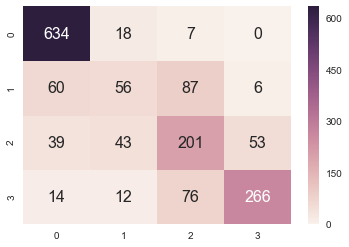

In [84]:
print_metrics(gs.best_estimator_, featuresCV, labelsCV)

## LogisticRegression

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
cls = LogisticRegression

In [87]:
params = {
    'C': [0.1, 1.0, 10.0],
    #'class_weight': ['balanced', None],
    'random_state': [64],
    'solver': ['newton-cg'], #, 'sag', 'saga', 'lbfgs'
    'multi_class': ['multinomial'], #'ovr', 
    'max_iter': [10, 50, 100, 200, 500]
}

In [88]:
gs = GridSearchCV(cls(), params, scoring='accuracy', cv=5, n_jobs=-1, error_score=0)

In [89]:
len(list(ParameterGrid(params)))

15

In [90]:
%%time
gs.fit(features, labels)

Wall time: 33.9 s


GridSearchCV(cv=5, error_score=0,
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.1, 1.0, 10.0], 'random_state': [64], 'solver': ['newton-cg'], 'multi_class': ['multinomial'], 'max_iter': [10, 50, 100, 200, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [91]:
sorted(gs.grid_scores_, key=lambda x: x.mean_validation_score, reverse=True)[:50]

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.72613, std: 0.01281, params: {'C': 10.0, 'max_iter': 50, 'multi_class': 'multinomial', 'random_state': 64, 'solver': 'newton-cg'},
 mean: 0.72613, std: 0.01281, params: {'C': 10.0, 'max_iter': 100, 'multi_class': 'multinomial', 'random_state': 64, 'solver': 'newton-cg'},
 mean: 0.72613, std: 0.01281, params: {'C': 10.0, 'max_iter': 200, 'multi_class': 'multinomial', 'random_state': 64, 'solver': 'newton-cg'},
 mean: 0.72613, std: 0.01281, params: {'C': 10.0, 'max_iter': 500, 'multi_class': 'multinomial', 'random_state': 64, 'solver': 'newton-cg'},
 mean: 0.72406, std: 0.01385, params: {'C': 1.0, 'max_iter': 50, 'multi_class': 'multinomial', 'random_state': 64, 'solver': 'newton-cg'},
 mean: 0.72406, std: 0.01385, params: {'C': 1.0, 'max_iter': 100, 'multi_class': 'multinomial', 'random_state': 64, 'solver': 'newton-cg'},
 mean: 0.72406, std: 0.01385, params: {'C': 1.0, 'max_iter': 200, 'multi_class': 'multinomial', 'random_state': 64, 'solver': 'newton-cg'},
 mean: 0.72406, st

accuracy:  0.721374045802

             precision    recall  f1-score   support

          1       0.85      0.95      0.90       659
          2       0.41      0.23      0.30       209
          3       0.52      0.56      0.54       336
          4       0.77      0.74      0.75       368

avg / total       0.70      0.72      0.71      1572

macro precision:  0.635520699035
micro precision:  0.721374045802

micro recall:  0.721374045802
macro recall:  0.61971300036

micro f1:  0.721374045802
macro f1:  0.620796129166


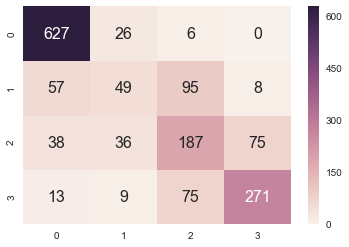

In [92]:
print_metrics(gs.best_estimator_, featuresCV, labelsCV)

## LDA

In [93]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [94]:
cls = LinearDiscriminantAnalysis

In [95]:
params = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': [None, 'auto', 0.0001, 0.001, 0.01],
    'tol': [1e-4, 1e-3, 1e-1, 1e-10]
}

In [96]:
gs = GridSearchCV(cls(), params, scoring='accuracy', cv=5, n_jobs=-1, error_score=0)
len(list(ParameterGrid(params)))

60

In [97]:
%%time
gs.fit(features, labels)

Wall time: 9.72 s


GridSearchCV(cv=5, error_score=0,
       estimator=LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'solver': ['svd', 'lsqr', 'eigen'], 'shrinkage': [None, 'auto', 0.0001, 0.001, 0.01], 'tol': [0.0001, 0.001, 0.1, 1e-10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [98]:
sorted(gs.grid_scores_, key=lambda x: x.mean_validation_score, reverse=True)[:10]

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.70910, std: 0.00770, params: {'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.0001},
 mean: 0.70910, std: 0.00770, params: {'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.001},
 mean: 0.70910, std: 0.00770, params: {'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.1},
 mean: 0.70910, std: 0.00770, params: {'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 1e-10},
 mean: 0.70878, std: 0.00784, params: {'shrinkage': 0.001, 'solver': 'lsqr', 'tol': 0.0001},
 mean: 0.70878, std: 0.00784, params: {'shrinkage': 0.001, 'solver': 'lsqr', 'tol': 0.001},
 mean: 0.70878, std: 0.00784, params: {'shrinkage': 0.001, 'solver': 'lsqr', 'tol': 0.1},
 mean: 0.70878, std: 0.00784, params: {'shrinkage': 0.001, 'solver': 'lsqr', 'tol': 1e-10},
 mean: 0.70735, std: 0.00805, params: {'shrinkage': 0.0001, 'solver': 'lsqr', 'tol': 0.0001},
 mean: 0.70735, std: 0.00805, params: {'shrinkage': 0.0001, 'solver': 'lsqr', 'tol': 0.001}]

accuracy:  0.700381679389

             precision    recall  f1-score   support

          1       0.86      0.92      0.89       659
          2       0.35      0.33      0.34       209
          3       0.50      0.49      0.49       336
          4       0.76      0.72      0.74       368

avg / total       0.69      0.70      0.70      1572

macro precision:  0.619125207552
micro precision:  0.700381679389

micro recall:  0.700381679389
macro recall:  0.613407258837

micro f1:  0.700381679389
macro f1:  0.615790656244


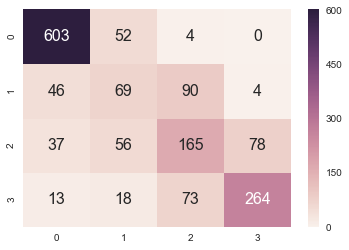

In [99]:
print_metrics(gs.best_estimator_, featuresCV, labelsCV)

In [104]:
df_results

,Algoritmus,F1_makro,P_0,P_1,P_2,P_3,S,Transformácia,Ú_0,Ú_1,Ú_2,Ú_3
0,DecisionTreeClassifier,0.62,0.84,0.49,0.49,0.75,0.72,nie,0.96,0.28,0.48,0.74
1,GradientBoostingClassifier,0.64,0.85,0.46,0.55,0.80,0.74,nie,0.97,0.28,0.59,0.72
2,KNeighborsClassifier,0.58,0.78,0.38,0.49,0.78,0.69,nie,0.98,0.15,0.52,0.66
3,LogisticRegression,0.64,0.84,0.48,0.53,0.81,0.73,nie,0.97,0.30,0.59,0.68
4,GradientBoostingClassifier,0.64,0.85,0.43,0.54,0.82,0.74,áno,0.96,0.27,0.60,0.72
5,LogisticRegression,0.62,0.85,0.41,0.52,0.77,0.72,áno,0.95,0.23,0.56,0.74
6,LinearDiscriminantAnalysis,0.62,0.86,0.35,0.50,0.76,0.70,áno,0.92,0.33,0.49,0.72


# LinearSVC

In [100]:
from sklearn.svm import LinearSVC

In [101]:
cls = LinearSVC

In [102]:
params = {
    'penalty': ['l1', 'l2'],
    'loss': ['hinge', 'squared_hinge'],
    #'tol': [1e-4, 1e-3, 1e-1, 1e-10],
    'C': [0.5, 1, 10, 20, 50], 
    'multi_class': ['crammer_singer'], #, 'ovr' 
    #'class_weight': [None, 'balanced'],
    'max_iter': [100, 500, 1000, 5000]
}

In [103]:
gs = GridSearchCV(cls(), params, scoring='accuracy', cv=5, n_jobs=-1, error_score=0)
len(list(ParameterGrid(params)))

80

In [105]:
%%time
gs.fit(features, labels)

Wall time: 2h 20min 19s


GridSearchCV(cv=5, error_score=0,
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'loss': ['hinge', 'squared_hinge'], 'C': [0.5, 1, 10, 20, 50], 'multi_class': ['crammer_singer'], 'max_iter': [100, 500, 1000, 5000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [106]:
sorted(gs.grid_scores_, key=lambda x: x.mean_validation_score, reverse=True)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.72088, std: 0.01379, params: {'C': 20, 'loss': 'squared_hinge', 'max_iter': 500, 'multi_class': 'crammer_singer', 'penalty': 'l1'},
 mean: 0.72024, std: 0.00924, params: {'C': 20, 'loss': 'squared_hinge', 'max_iter': 500, 'multi_class': 'crammer_singer', 'penalty': 'l2'},
 mean: 0.72024, std: 0.00986, params: {'C': 20, 'loss': 'squared_hinge', 'max_iter': 5000, 'multi_class': 'crammer_singer', 'penalty': 'l1'},
 mean: 0.71992, std: 0.01094, params: {'C': 20, 'loss': 'hinge', 'max_iter': 500, 'multi_class': 'crammer_singer', 'penalty': 'l2'},
 mean: 0.71961, std: 0.00966, params: {'C': 20, 'loss': 'hinge', 'max_iter': 1000, 'multi_class': 'crammer_singer', 'penalty': 'l2'},
 mean: 0.71961, std: 0.00650, params: {'C': 20, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'crammer_singer', 'penalty': 'l1'},
 mean: 0.71945, std: 0.00708, params: {'C': 20, 'loss': 'squared_hinge', 'max_iter': 100, 'multi_class': 'crammer_singer', 'penalty': 'l2'},
 mean: 0.71929, std: 0.007

accuracy:  0.729007633588

             precision    recall  f1-score   support

          1       0.84      0.98      0.90       659
          2       0.49      0.17      0.25       209
          3       0.52      0.56      0.54       336
          4       0.76      0.74      0.75       368

avg / total       0.70      0.73      0.70      1572

macro precision:  0.650402502276
micro precision:  0.729007633588

micro recall:  0.729007633588
macro recall:  0.614976168101

micro f1:  0.729007633588
macro f1:  0.612238795924


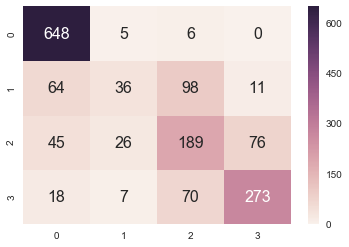

In [107]:
print_metrics(gs.best_estimator_, featuresCV, labelsCV)

# MLP

In [108]:
from sklearn.neural_network import MLPClassifier

In [109]:
cls = MLPClassifier

In [110]:
params = {
    'hidden_layer_sizes': [(100,), (50,), (200,)],
    'activation': ['identity'], #, 'logistic', 'tanh', 'relu'
    'solver': ['lbfgs'], #, 'sgd', 'adam'
    'alpha': [0.0001, 0.00001, 0.001],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [100, 200, 300],
}

In [111]:
gs = GridSearchCV(cls(), params, scoring='accuracy', cv=5, n_jobs=-1, error_score=0)
len(list(ParameterGrid(params)))

81

In [112]:
%%time
gs.fit(features, labels)

Wall time: 12min 14s


GridSearchCV(cv=5, error_score=0,
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'hidden_layer_sizes': [(100,), (50,), (200,)], 'activation': ['identity'], 'solver': ['lbfgs'], 'alpha': [0.0001, 1e-05, 0.001], 'learning_rate': ['constant', 'invscaling', 'adaptive'], 'max_iter': [100, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [113]:
sorted(gs.grid_scores_, key=lambda x: x.mean_validation_score, reverse=True)[:20]

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.73138, std: 0.01300, params: {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'max_iter': 300, 'solver': 'lbfgs'},
 mean: 0.72884, std: 0.01635, params: {'activation': 'identity', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'max_iter': 300, 'solver': 'lbfgs'},
 mean: 0.72868, std: 0.01496, params: {'activation': 'identity', 'alpha': 1e-05, 'hidden_layer_sizes': (200,), 'learning_rate': 'invscaling', 'max_iter': 200, 'solver': 'lbfgs'},
 mean: 0.72836, std: 0.01856, params: {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'max_iter': 300, 'solver': 'lbfgs'},
 mean: 0.72836, std: 0.01413, params: {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (200,), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'lbfgs'},
 mean: 0.72836, std: 0.01392, params: {'activation': 'identity', 'alpha': 0.001, 'hidden_layer_sizes': (100,), '

accuracy:  0.712468193384

             precision    recall  f1-score   support

          1       0.86      0.95      0.90       659
          2       0.40      0.23      0.29       209
          3       0.49      0.54      0.52       336
          4       0.75      0.73      0.74       368

avg / total       0.69      0.71      0.70      1572

macro precision:  0.62517074317
micro precision:  0.712468193384

micro recall:  0.712468193384
macro recall:  0.610561748029

micro f1:  0.712468193384
macro f1:  0.611063867612


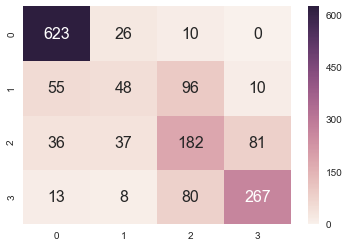

In [114]:
print_metrics(gs.best_estimator_, featuresCV, labelsCV)

# Results

In [118]:
df_results[['Algoritmus','Transformácia','S','P_0','P_1','P_2','P_3','Ú_0','Ú_1','Ú_2','Ú_3', 'F1_makro']]\
.sort_values(by=['S'], ascending=False)

,Algoritmus,Transformácia,S,P_0,P_1,P_2,P_3,Ú_0,Ú_1,Ú_2,Ú_3,F1_makro
1,GradientBoostingClassifier,nie,0.74,0.85,0.46,0.55,0.80,0.97,0.28,0.59,0.72,0.64
4,GradientBoostingClassifier,áno,0.74,0.85,0.43,0.54,0.82,0.96,0.27,0.60,0.72,0.64
3,LogisticRegression,nie,0.73,0.84,0.48,0.53,0.81,0.97,0.30,0.59,0.68,0.64
7,LinearSVC,áno,0.73,0.84,0.49,0.52,0.76,0.98,0.17,0.56,0.74,0.61
0,DecisionTreeClassifier,nie,0.72,0.84,0.49,0.49,0.75,0.96,0.28,0.48,0.74,0.62
5,LogisticRegression,áno,0.72,0.85,0.41,0.52,0.77,0.95,0.23,0.56,0.74,0.62
8,MLPClassifier,áno,0.71,0.86,0.40,0.49,0.75,0.95,0.23,0.54,0.73,0.61
6,LinearDiscriminantAnalysis,áno,0.70,0.86,0.35,0.50,0.76,0.92,0.33,0.49,0.72,0.62
2,KNeighborsClassifier,nie,0.69,0.78,0.38,0.49,0.78,0.98,0.15,0.52,0.66,0.58


In [119]:
df_results[['Algoritmus','Transformácia','S','P_0','P_1','P_2','P_3','Ú_0','Ú_1','Ú_2','Ú_3', 'F1_makro']]\
.sort_values(by=['S'], ascending=False).to_csv('results/tuning_static_dynamic_no_categories.csv')

# NO TUNING - EXPERIMENTS TESTING NLP FEATURES IMPACT
see notebook Checkpoints/HP tuning + NLP